# Exploratory data analysis

## Loading libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

## Loading data

In [2]:
df = pd.read_csv('../data/learning_data.csv')
df.head()

,ptnum,label,scc,C-103579009,C-125680007,C-186034007,C-263495000,C-398070004,C-424144002,C-72514-3,...,C-92140-3,C-92141-1,C-92142-9,C-94040-3,C-94531-1,C-979092,C-993452,C-997501,C-999998,C-999999
0,p17767.2,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p3832.1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p10784.2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p17630,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p17983,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We will be predicting value in column 'label' (1 - patient diagnosed with lung cancer, 0 - patient undiagnosed ) using the other columns as features.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Columns: 785 entries, ptnum to C-999999
dtypes: float64(59), int64(2), object(724)
memory usage: 54.2+ MB


In [4]:
df.describe()

,label,scc,C-75443-2,C-84215-3,C-26453-1,C-26464-8,C-26515-7,C-30385-9,C-30428-7,C-33037-3,...,C-713-8,C-727711,C-731-0,C-736-9,C-742-7,C-751-8,C-770-8,C-82078001,C-86849004,C-86964003
count,9048.000000,9048.000000,16.0,16.0,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,256.000000,0.0,256.000000,256.00000,256.000000,256.000000,256.000000,0.0,0.0,0.0
mean,0.252874,103.895999,1.0,1.0,5.125166,13.175497,308.200662,13.006623,87.692715,8.339073,...,4.513672,NaN,0.945664,15.17957,0.948047,2.679688,27.573555,NaN,NaN,NaN
std,0.434683,21.988655,0.0,0.0,0.379863,1.223817,88.495507,0.899605,4.636940,3.508351,...,0.255184,NaN,0.154276,1.67533,0.075522,0.225392,3.014690,NaN,NaN,NaN
min,0.000000,9.000000,1.0,1.0,4.500000,11.100000,155.300000,11.600000,80.000000,2.000000,...,3.740000,NaN,0.500000,10.32000,0.750000,2.080000,18.610000,NaN,NaN,NaN
25%,0.000000,100.000000,1.0,1.0,4.800000,12.000000,232.950000,12.150000,83.600000,5.500000,...,4.370000,NaN,0.980000,14.08250,0.900000,2.540000,25.457500,NaN,NaN,NaN
50%,0.000000,107.000000,1.0,1.0,5.100000,13.400000,304.100000,13.100000,88.100000,8.200000,...,4.500000,NaN,1.000000,15.19000,0.950000,2.690000,27.840000,NaN,NaN,NaN
75%,1.000000,116.000000,1.0,1.0,5.400000,14.300000,386.550000,13.800000,91.400000,11.350000,...,4.680000,NaN,1.020000,16.38500,1.000000,2.830000,29.502500,NaN,NaN,NaN
max,1.000000,190.000000,1.0,1.0,5.900000,15.000000,449.900000,14.600000,96.000000,14.900000,...,5.240000,NaN,1.090000,20.15000,1.160000,3.260000,34.850000,NaN,NaN,NaN


## Nulls

In [5]:
null_percentages = df.isnull().mean().reset_index()
null_percentages.sort_values(by=0, ascending=False, inplace=True)
null_percentages.columns = ['Column', 'Nulls']
print('First 10 columns with highest percentage of nulls:')
print(tabulate(null_percentages.head(25), headers='keys', tablefmt='simple'))

First 10 columns with highest percentage of nulls:
     Column         Nulls
---  -----------  -------
715  C-48387007         1
733  C-698423002        1
753  C-82078001         1
613  C-13569004         1
615  C-1373463          1
742  C-727711           1
616  C-14152002         1
689  C-313572           1
620  C-161621004        1
610  C-113076002        1
738  C-707418001        1
765  C-86849004         1
766  C-86964003         1
699  C-406602003        1
681  C-288328004        1
700  C-408512008        1
702  C-427089005        1
652  C-232657004        1
707  C-444260001        1
708  C-448417001        1
647  C-205532           1
709  C-448813005        1
717  C-52734007         1
640  C-198767           1
633  C-190905008        1


In feature engineering we will drop the columns with only null values. Other columns with null values will be either imputed or dropped based on the percentage of null values.

Another not neccesary column is ptnum, which is just a patient number

In [6]:
df = df.drop('ptnum', axis=1)

## Decoding column names

In [7]:
df_codes = pd.read_csv('../data/codes.csv')
code_to_name = df_codes.set_index('code')['name'].to_dict()
df = df.rename(columns=code_to_name)
df.head()

,label,scc,race,marital,ethnic,gender,state,age,Pain severity - 0-10 verbal numeric rating [Score] - Reported,Influenza seasonal injectable preservative free,...,Parainfluenza virus 1 RNA [Presence] in Respiratory specimen by NAA with probe detection,Influenza virus B RNA [Presence] in Respiratory specimen by NAA with probe detection,Influenza virus A RNA [Presence] in Respiratory specimen by NAA with probe detection,Adenovirus A+B+C+D+E DNA [Presence] in Respiratory specimen by NAA with probe detection,SARS-CoV-2 RNA Pnl Resp NAA+probe,Hydroxychloroquine Sulfate 200 MG Oral Tablet,1 ML denosumab 60 MG/ML Prefilled Syringe,Fexofenadine hydrochloride 60 MG Oral Tablet,Leronlimab 700 MG Injection,Lenzilumab 200 MG IV
0,0,101,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,110,white,m,nonhispanic,m,massachusetts,50t70,normal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,127,black,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,129,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69,white,m,nonhispanic,m,massachusetts,50t70,abnormal,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
column_names = df.columns
print(column_names)

Index(['label', 'scc', 'race', 'marital', 'ethnic', 'gender', 'state', 'age',
       'Pain severity - 0-10 verbal numeric rating [Score] - Reported',
       'Influenza  seasonal  injectable  preservative free',
       ...
       'Parainfluenza virus 1 RNA [Presence] in Respiratory specimen by NAA with probe detection',
       'Influenza virus B RNA [Presence] in Respiratory specimen by NAA with probe detection',
       'Influenza virus A RNA [Presence] in Respiratory specimen by NAA with probe detection',
       'Adenovirus A+B+C+D+E DNA [Presence] in Respiratory specimen by NAA with probe detection',
       'SARS-CoV-2 RNA Pnl Resp NAA+probe',
       'Hydroxychloroquine Sulfate 200 MG Oral Tablet',
       '1 ML denosumab 60 MG/ML Prefilled Syringe',
       'Fexofenadine hydrochloride 60 MG Oral Tablet',
       'Leronlimab 700 MG Injection', 'Lenzilumab 200 MG IV'],
      dtype='object', length=784)


## Destribution of categorical values

In [9]:
categorical_columns = df.select_dtypes(include = ['object'])

In [10]:
df.shape

(9048, 784)

In [11]:
columns = df.columns
unique_columns = list(set(columns))  # Get unique column names

# Create a new DataFrame with combined columns
df_combined = pd.DataFrame()

# Iterate over the unique columns to combine and merge appropriately
for col in unique_columns:
    if list(columns).count(col) > 1:  # If the column name is duplicated
        # Find all columns with this name and combine them, e.g., with first non-null
        combined_series = df[[col]].bfill(axis=1).iloc[:, 0]  # Backfill to combine
        df_combined[col] = combined_series
    else:
        df_combined[col] = df[col]  # If it's unique, just copy the column

print("\nDataFrame after combining columns with the same name:")
print(df_combined)


DataFrame after combining columns with the same name:
     Glucose Throat culture (procedure)  \
0     normal                        NaN   
1     normal                        NaN   
2     normal                        NaN   
3     normal                        NaN   
4     normal                        NaN   
...      ...                        ...   
9043  normal                        NaN   
9044  normal                       True   
9045  normal                        NaN   
9046  normal                        NaN   
9047  normal                       True   

     Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma  \
0                                                   NaN                        
1                                              abnormal                        
2                                              abnormal                        
3                                              abnormal                        
4                           

In [12]:
df = df_combined.copy()

In [13]:
df.drop(columns=['race', 'ethnic'], inplace=True)

### Distribution of label

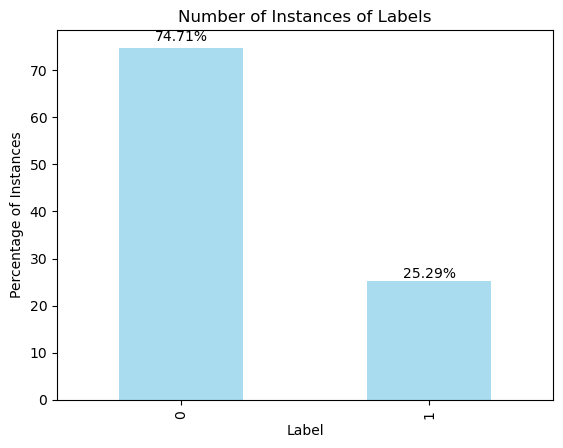

In [14]:
counts = df['label'].value_counts()
percentages = counts / counts.sum() * 100

ax = percentages.plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Label')
plt.ylabel('Percentage of Instances')
plt.title('Number of Instances of Labels')

# Add percentage values on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height*1.02), ha='center')

plt.show()

### Conclusions
- 24,47 % patients  have a label of 1
- during feature engineering we will have to:
    - drop columns with only null values,
    - reduce the number of columns,
    - potentially impute null values in some columns,
    - potentially create new features